# **SMS SPAM CLASSIFIER**



*   The goal is to build a machine learning model that can *accurately classify new SMS messages as spam or not spam based on the extracted features*.
*   Kaggle dataset link named as **SMS Spam Collection** - https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset
*   The **SMS Spam Collection** is a set of SMS tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of *5,574 messages*, tagged acording being *ham (legitimate) or spam*.
The files contain one message per line.
*   Each line is composed by two columns: v1 contains the label (ham or spam) and v2 contains the raw text.



## **Importing the libraries**

In [59]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split #evaluating the model
from sklearn.preprocessing import LabelEncoder #for encoding label
from sklearn.feature_extraction.text import TfidfVectorizer  #for converting string to feature vector i.e.,numeric for ml model
from sklearn.feature_extraction.text import CountVectorizer  #for token count
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
import nltk #natural language tool kit
from collections import Counter

## **Data Collection**

In [60]:
#loading the data from csv file to a pandas dataframe
encoding='latin1'  #latin1 is a character encoding that is commonly used for data that contains characters from Western European languages
raw_mail_data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/sms-spam-classifier/spam.csv',encoding=encoding)

In [61]:
print(raw_mail_data)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


In [62]:
raw_mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


## **Data Cleaning**

<Axes: >

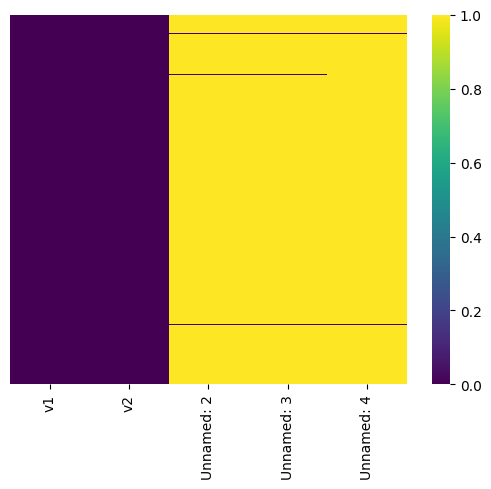

In [63]:
sns.heatmap(raw_mail_data.isnull(), yticklabels = False, cbar = True, cmap = 'viridis')
# cbar : boolean, optional: Whether to draw a colorbar.
# new matplotlib default colormap (“viridis”)

In [64]:
 #droping last 3 rows bcoz not containing essential details
 #inplace=True means working in same file,we are not making copy
raw_mail_data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [65]:
raw_mail_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [66]:
raw_mail_data.rename(columns={'v1':'type','v2':'text'},inplace=True)  #renaming both column name into type and text
raw_mail_data.head()

,type,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [67]:
raw_mail_data['type']=LabelEncoder().fit_transform(raw_mail_data['type'])  #assigning ham->0 and spam->1

In [68]:
raw_mail_data.head()

,type,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [69]:
#checking missing values
raw_mail_data.isnull().sum()

type    0
text    0
dtype: int64

In [70]:
#check duplicate values
raw_mail_data.duplicated().sum()

403

In [71]:
#removing duplicates and note-> keep='first' means that when there are duplicate rows in a DataFrame, the first occurrence of each duplicate row will be kept and all subsequent occurrences will be dropped.
raw_mail_data=raw_mail_data.drop_duplicates(keep='first')

In [72]:
raw_mail_data.duplicated().sum()

0

In [73]:
raw_mail_data.shape

(5169, 2)

## **Exploratory Data Analysis**

<Axes: xlabel='type', ylabel='count'>

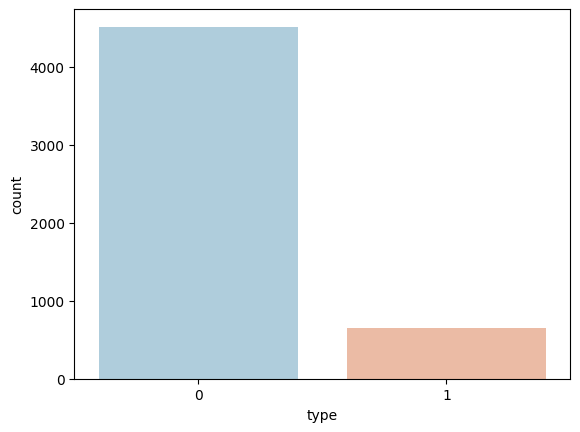

In [74]:
sns.countplot(x = 'type', data =raw_mail_data,palette = 'RdBu_r')

In [75]:
raw_mail_data['type'].value_counts()   #number of hams and spams

0    4516
1     653
Name: type, dtype: int64

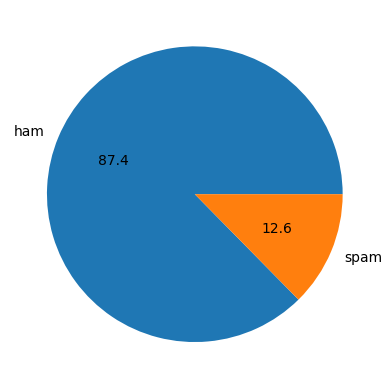

In [76]:
plt.pie(raw_mail_data['type'].value_counts() ,labels=['ham','spam'],autopct="%0.1f")
plt.show()

In [77]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [78]:
raw_mail_data['num_characters']=raw_mail_data['text'].apply(len) #for number of characters present in text
raw_mail_data['num_words']=raw_mail_data['text'].apply(lambda x:len(nltk.word_tokenize(x)))  #for number of words present in text
raw_mail_data['num_sentence']=raw_mail_data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))  #for number of sentence present in text
raw_mail_data.head()

,type,text,num_characters,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [79]:
raw_mail_data[raw_mail_data['type']==0][['num_characters','num_words','num_sentence']].describe()  #for ham sms

,num_characters,num_words,num_sentence
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [80]:
raw_mail_data[raw_mail_data['type']==1][['num_characters','num_words','num_sentence']].describe()  #for spam mail

,num_characters,num_words,num_sentence
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


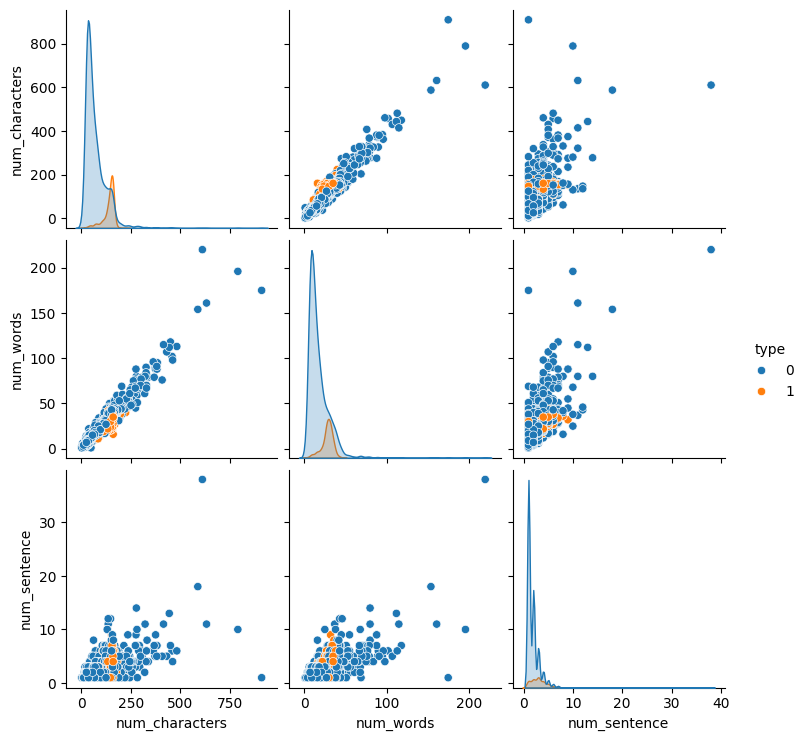

In [81]:
sns.pairplot(raw_mail_data,hue='type')

<Axes: >

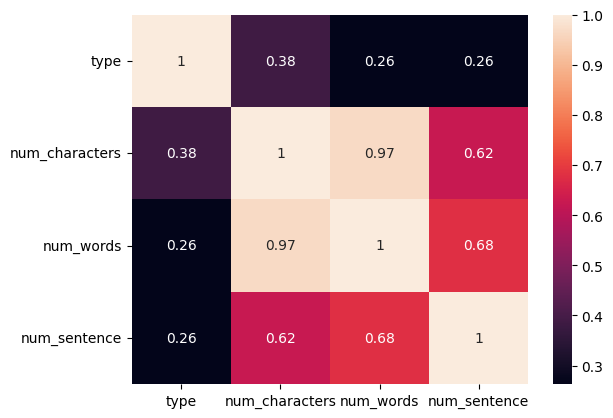

In [82]:
sns.heatmap(raw_mail_data.corr(),annot=True)  #corelation between features and annot means numeric value and here highest is for num_char
#type will be 1 i.e.,spam on increasing num_character

## **Data Preprocessing**

In [83]:
from nltk.corpus import stopwords
nltk.download('stopwords')   #for stopwords
import string    #for getting punctuation
from nltk.stem.porter import PorterStemmer   #for steeming

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [84]:
#Steps: the lower case,tokenization,removing special characters,removing stopwords(the,a,an,etc) and punctuation and last stemming("running" can be stemmed to "run")
def transform_text(text):
  text=text.lower()  #for lower case
  text=nltk.word_tokenize(text)   #for tokenize
  store=[]
  for i in text:    #for checking special characters
    if i.isalnum():
      if i not in stopwords.words('english') and i not in string.punctuation:    #for stopwords in english & punctuations
        store.append(PorterStemmer().stem(i))     # for stemming the word

  return ' '.join(store)    #for converting list to string with delimiter

raw_mail_data['text'].apply(transform_text)


0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: text, Length: 5169, dtype: object

In [85]:
raw_mail_data['transformed_text']=raw_mail_data['text'].apply(transform_text)    #creating column for transformed text
raw_mail_data.sample(5)

,type,text,num_characters,num_words,num_sentence,transformed_text
1208,0,Also maaaan are you missing out,31,6,1,also maaaan miss
2186,0,So is there anything specific I should be doin...,104,20,1,anyth specif regard jaklin idk fuck
1598,0,Daddy will take good care of you :),35,9,1,daddi take good care
2851,0,how tall are you princess?,26,6,1,tall princess
5127,0,Cuz ibored. And don wanna study,31,8,2,cuz ibor wan na studi


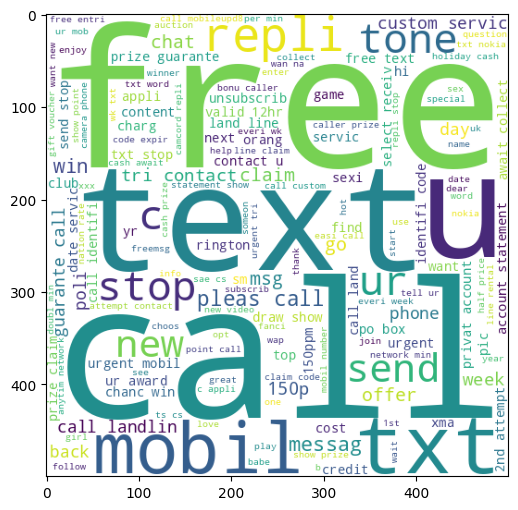

In [86]:
from wordcloud import WordCloud  #for getting words used often
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
#for spam sms
spam_wc=wc.generate(raw_mail_data[raw_mail_data['type']==1]['transformed_text'].str.cat(sep=" "))  #cat for join space
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)    #display data as image

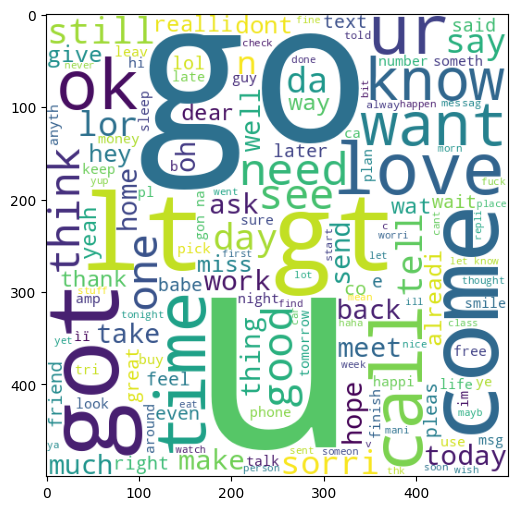

In [87]:
ham_wc=wc.generate(raw_mail_data[raw_mail_data['type']==0]['transformed_text'].str.cat(sep=" "))   #for ham sms
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [88]:
#for checking top 10 word of spam
spam=[]
for i in raw_mail_data[raw_mail_data['type']==1]['transformed_text'].tolist():
  for j in i.split():
    spam.append(j)
pd.DataFrame(Counter(spam).most_common(10))


,0,1
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


In [89]:
#for checking top 10 word of ham
ham=[]
for i in raw_mail_data[raw_mail_data['type']==0]['transformed_text'].tolist():
  for j in i.split():
    ham.append(j)
pd.DataFrame(Counter(ham).most_common(10))

,0,1
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


## **Model Building**



## **1.   Using BoW vectorizer for Naive Bayes Classifier**



In [90]:

cv=CountVectorizer()   #for bag-of-words vectorizer
#Partioning both columns in diff. variables
#feature extracting
X=cv.fit_transform(raw_mail_data['transformed_text']).toarray()      #converting text into numeric type or lets say vector form
print(X)
X.shape

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


(5169, 6708)

In [91]:
Y=raw_mail_data['type'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [92]:
#tset_size=0.2==20%
#random_state->When the random_state is set to a specific value, the algorithm will always produce the same results given the same input data.
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [93]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB   #importing naive bayes libraries
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

#using guassian naive bayes algorithm
trained_model=gnb.fit(X_train,Y_train)
Y_pred=gnb.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Precision:",precision_score(Y_test,Y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_pred))
print("Model score:",trained_model.score(X_train, Y_train))

Accuracy: 0.8800773694390716
Precision: 0.5315315315315315
Confusion Matrix:
 [[792 104]
 [ 20 118]]
Model score: 0.9230955259975816


In [94]:
#using multinomial naive bayes algorithm
trained_model=mnb.fit(X_train,Y_train)
Y_pred=mnb.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Precision:",precision_score(Y_test,Y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_pred))
print("Model score:",trained_model.score(X_train, Y_train))

Accuracy: 0.9642166344294004
Precision: 0.8344370860927153
Confusion Matrix:
 [[871  25]
 [ 12 126]]
Model score: 0.9915356711003628


In [95]:
#using bernoulli naive bayes algorithm
trained_model=bnb.fit(X_train,Y_train)
Y_pred=bnb.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Precision:",precision_score(Y_test,Y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_pred))
print("Model score:",trained_model.score(X_train, Y_train))

Accuracy: 0.9700193423597679
Precision: 0.9734513274336283
Confusion Matrix:
 [[893   3]
 [ 28 110]]
Model score: 0.9765417170495768




## **2.   Using TF-IDF vectorizer for Naive Bayes Classifier**



In [96]:
tfidf=TfidfVectorizer()  #term frequency-inverse document frequency (TF-IDF)
X=tfidf.fit_transform(raw_mail_data['transformed_text']).toarray()
print(X)
X.shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(5169, 6708)

In [97]:
Y=raw_mail_data['type'].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [98]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [99]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

#using guassian naive bayes algorithm
trained_model=gnb.fit(X_train,Y_train)
Y_pred=gnb.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Precision:",precision_score(Y_test,Y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_pred))
print("Model score:",trained_model.score(X_train, Y_train))

Accuracy: 0.8762088974854932
Precision: 0.5231481481481481
Confusion Matrix:
 [[793 103]
 [ 25 113]]
Model score: 0.9230955259975816


In [100]:
#using multinomial naive bayes algorithm
trained_model=mnb.fit(X_train,Y_train)
Y_pred=mnb.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Precision:",precision_score(Y_test,Y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_pred))
print("Model score:",trained_model.score(X_train, Y_train))

Accuracy: 0.9593810444874274
Precision: 1.0
Confusion Matrix:
 [[896   0]
 [ 42  96]]
Model score: 0.9709794437726723


In [101]:
#using bernoulli naive bayes algorithm
trained_model=bnb.fit(X_train,Y_train)
Y_pred=bnb.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Precision:",precision_score(Y_test,Y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_pred))
print("Model score:",trained_model.score(X_train, Y_train))

Accuracy: 0.9700193423597679
Precision: 0.9734513274336283
Confusion Matrix:
 [[893   3]
 [ 28 110]]
Model score: 0.9765417170495768




## **3.   Using TF-IDF vectorizer for SVM classifier**



In [102]:
from sklearn.svm import SVC
svc=SVC(kernel='sigmoid',gamma=1.0)   #the parameter gamma controls the influence of individual training examples
trained_model=svc.fit(X_train,Y_train)
Y_pred=svc.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Precision:",precision_score(Y_test,Y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_pred))
print("Model score:",trained_model.score(X_train, Y_train))

Accuracy: 0.9729206963249516
Precision: 0.9741379310344828
Confusion Matrix:
 [[893   3]
 [ 25 113]]
Model score: 0.9859733978234583


## **4. Using TF-IDF vectorizer for KNN classifier**

In [103]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
trained_model=knn.fit(X_train,Y_train)
Y_pred=knn.predict(X_test)
print("Accuracy:",accuracy_score(Y_test,Y_pred))
print("Precision:",precision_score(Y_test,Y_pred))
print("Confusion Matrix:\n",confusion_matrix(Y_test,Y_pred))
print("Model score:",trained_model.score(X_train, Y_train))

Accuracy: 0.9003868471953579
Precision: 1.0
Confusion Matrix:
 [[896   0]
 [103  35]]
Model score: 0.9192261185006046


## **Building a Predictive System**

### Using TF-IDF vectorizer with Multinomial Naive Bayes Classifer

In [104]:
#due to high precision i.e.,100% ,we are moving with TFIDF vectorizer with Multinomial Naive Bayes Classifer
#now lets predict sms is spam or ham!
def transform_text(text):
  text=text.lower()  #for lower case
  text=nltk.word_tokenize(text)   #for tokenize
  store=[]
  for i in text:    #for checking special characters
    if i.isalnum():
      if i not in stopwords.words('english') and i not in string.punctuation:    #for stopwords in english & punctuations
        store.append(PorterStemmer().stem(i))     # for stemming the word

  return ' '.join(store)    #for converting list to string with delimiter

sms=input("Enter the SMS:")
X_store=transform_text(sms)     #input

X_test1=tfidf.transform([X_store])     #vectorizing
#print(X_test1)

# Apply the learner to the new, unclassified observation.
result=mnb.predict(X_test1)

# We can even look at the probabilities the learner assigned to each class:
print("\nProbability of model:",mnb.predict_proba(X_test1))   #first column is for Ham and other is for spam
print("\n--------------Result---------------")
if result==0:
  print("\nIt is a Ham SMS!")
else:
  print("\nIt is a Spam SMS!")

Enter the SMS:congratulations you won 1000 call on this number to get your prize

Probability of model: [[0.48600207 0.51399793]]

--------------Result---------------

It is a Spam SMS!
